
# General Information on CUDA Operations


torch.cuda is used to set up and run CUDA operations. It keeps track of the currently selected GPU, and all CUDA tensors you allocate will by default be created on that device. The selected device can be changed with a torch.cuda.device context manager. [More Infos](https://|pytorch.org/docs/stable/notes/cuda.html) 


CUDA (or Compute Unified Device Architecture) is a parallel computing platform and application programming interface (API) that allows software to use certain types of graphics processing unit (GPU) for general purpose processing – an approach called general-purpose computing on GPUs (GPGPU). 

Here, CUDA was not implemented as Google Colab enables manual selection on the type of runtime desired, thus making runtime directly on the GPU possible. 

# Setting up the environment

In [1]:
!pip install tensorflow-gpu --quiet
!pip install transformers --quiet
!pip install pytorch_lightning --quiet
!pip install nlp --quiet
!pip install sentencepiece --quiet
!pip install pyyaml h5py                                                          # Required to save models in HDF5 format

"""
Notes:
(1) pip --quiet command enables the option to give less output. 
Option is additive, and can be used up to 3 times 
(corresponding to WARNING, ERROR, and CRITICAL logging levels).

(2) HDF5 Format referss to the Hierarchical Data Format version 5 (HDF5), 
which is an open source file format that supports large, complex, heterogeneous 
data. HDF5 uses a "file directory" like structure that allows you to organize 
data within the file in many different structured ways, as you might do with 
files on your computer. 
"""

     |████████████████████████████████| 497.5 MB 27 kB/s 
     |████████████████████████████████| 462 kB 47.5 MB/s 
     |████████████████████████████████| 3.5 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 895 kB 50.2 MB/s 
     |████████████████████████████████| 6.8 MB 34.4 MB/s 
     |████████████████████████████████| 596 kB 44.3 MB/s 
     |████████████████████████████████| 527 kB 5.0 MB/s 
     |████████████████████████████████| 952 kB 43.9 MB/s 
     |████████████████████████████████| 829 kB 36.3 MB/s 
     |████████████████████████████████| 133 kB 35.6 MB/s 
     |████████████████████████████████| 397 kB 33.7 MB/s 
     |████████████████████████████████| 1.1 MB 46.3 MB/s 
     |████████████████████████████████| 144 kB 57.5 MB/s 
     |████████████████████████████████| 271 kB 53.0 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the 

In [6]:
# Here we mount the google drive to the colab notebook, so that the model, 
# hyperparameters, weights, evaluation results, etc. can be directly saved to 
# the cloud without manual intervention. 

from google.colab import drive  
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Checking which GPU we've obtained from google colab and whether the RAM
# is free.

!nvidia-smi

Sun Feb 20 12:40:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------


**Explaination of the implemented libraries/modules**

> General libraries/modules

*   **argparse**: The recommended command-line parsing module in the Python standard library. It lets the user of the program provide values for variables at runtime and is a means of communication between the writer of a program and the user. [More Infos](https://towardsdatascience.com/learn-enough-python-to-be-useful-argparse-e482e1764e05)
*   **glob**: Used to find the files and folders whose names follow a specific pattern. The searching rules are similar to the Unix Shell path expansion rules. [More Info](https://pynative.com/python-glob/)
*   **os**: Allows the implementation of operating system tasks. The model provides functions for creating and removing a directory (folder), feching its contents, changing and identifying the current directory, etc. 
*   **json**: built-in Python module that can be used to work with JSON data


> Libraries/Modules for Natural Language Processing and Machine Learning

*   **nltk punkt**: This tokenizer divdes a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.
*  **nltk.tokenizer, sent_tokenize**: Tokenizers divide strings into lists of substrings. This module tokenizes texts at the level of sentences. *Caution: when tokenizing a Unicode string, make sure you are not using an encoded version of the string (it may be necessary to decode it first, e.g. with s.decode("utf8").*
*   **torch.utils.data; Dataloader**: A class that represents a Python iterable over a dataset with many supporting functions when loading a dataset. [More Infos](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) 
*   nlp: library to easily share and access datasets and evaluation metrics for Natural Language Processing (NLP). [More Infos](https://huggingface.co/docs/datasets/v0.3.0/index.html)


> Libraries/Modules and Model Configurations relatd to the T5 Transformer. More detailed information can be found [here](https://huggingface.co/docs/transformers/v4.15.0/en/model_doc/t5#transformers.T5ForConditionalGeneration)


*  **AdamW(Pytorch)**: Implements Adam algorithm with weight decay fix as introduced in [Decoupled Weight Decay Regularization](https://arxiv.org/abs/1711.05101)
*  **T5ForConditionalGeneration**: T5 Model with a language modeling head on top. This model inhereits from PreTrainedModel and is also a Pytorch torch.nn.Module subclass.
*   **T5Tokenizer**: Constructs a T5 tokenizer that is based on SentencePiece, which is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation system. 
*   **get_linear_schedule_with_warmup**: Create a schedule with a learning rate that decreases linearly from the initial learning rate set in the optimizer to 0, after a warmup period during which it increases linearly from 0 to the initial lr set in the optimizer.


In [4]:
# General Libearies/Modules 
import argparse
import glob
import os
import json
import time
import logging
import random
import re
from itertools import chain
from string import punctuation

# Natural Language Toolkit 
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Machine Learning Libraries
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from sklearn.model_selection import train_test_split
import nlp
import tensorflow as tf 
from tensorflow import keras

# To print out the questions and answers
from termcolor import colored
import textwrap

# Required to implement to training function of the T5 model 
from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5Tokenizer,
    get_linear_schedule_with_warmup
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Set the same seed across all libraries. e.g. numpy, torch and python
pl.seed_everything(42)

Global seed set to 42


42

# Data Preparation and Data Understanding


---


In this code segment the necessary preparations are completed to fine tune the T5 Transformer model in google colab. This includes freeing the GPU, importing the necessary libraries, loading the dataset and tokenizing the data 


When loading a Dataset object from the nlp libary, the object behaves like a normal python container. You can query its length, get rows, columns and also a lot of metadata on the dataset (description, citation, split sizes, etc). [More Infos](https://huggingface.co/docs/datasets/exploring.html)

In [8]:
# load train and validation split of squad
train_dataset  = nlp.load_dataset('squad', split=nlp.Split.TRAIN)
valid_dataset = nlp.load_dataset('squad', split=nlp.Split.VALIDATION)

# display the structure of the dataset for better visualisation
# also aids in converting the dataset into a panda DataFrame object for easier data understanding and data preparation
train_dataset.features

Downloading:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.12M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/408a8fa46a1e2805445b793f1022e743428ca739a34809fce872f0c7f17b44ab. Subsequent calls will reuse this data.


{'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None),
 'context': Value(dtype='string', id=None),
 'id': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None)}

In [10]:
""" 
Here we implement a method to extract the necessary information from the 
dataset loaded above. Although the T5 Transformer only requires the question, 
context and answer as input during its training phase, we return two additional 
parameters here: answer_start and answer_end, which will be helpful later for
visualization. 
"""

def extract_questions_and_answers(dataset: Dataset):
  # Initialize a blank list to be appended at the end
  data_rows = [] 

  # Iterate over all the entries in the dataset
  for entry in dataset:
    context = entry['context']
    question = entry['question']
    
    answer_text = entry['answers']['text'][0]
    answer_start = entry['answers']['answer_start'][0]
    answer_end = answer_start + len(answer_text)

    # Here we append only the useful features from the dataset that can be used
    # to train the T5 model
    data_rows.append({
        "Question": question, 
        "Context": context, 
        "Answer Text": answer_text,
        "Answer Start": answer_start,
        "Answer End": answer_end
      })
  
  # Return a panda DataFrame object, as this facilitates the summarization
  # and visualization of the dataset. 
  return pd.DataFrame(data_rows)


In [11]:
# Call the function on the imported dataset and gain an insight
df_train = extract_questions_and_answers(train_dataset)
df_train.head()

,Question,Context,Answer Text,Answer Start,Answer End
0,To whom did the Virgin Mary allegedly appear i...,"Architecturally, the school has a Catholic cha...",Saint Bernadette Soubirous,515,541
1,What is in front of the Notre Dame Main Building?,"Architecturally, the school has a Catholic cha...",a copper statue of Christ,188,213
2,The Basilica of the Sacred heart at Notre Dame...,"Architecturally, the school has a Catholic cha...",the Main Building,279,296
3,What is the Grotto at Notre Dame?,"Architecturally, the school has a Catholic cha...",a Marian place of prayer and reflection,381,420
4,What sits on top of the Main Building at Notre...,"Architecturally, the school has a Catholic cha...",a golden statue of the Virgin Mary,92,126


In [14]:
# Return the maximum number of words w.r.t. each column of the dataframe.
# Important when determining the max length of the tokenizer later, as the 
# T5 Transformer has a maximum number of words it can take as input and
# output. 

col_max_length = [] 

for columns in df_train:
  word_num = np.array([len(str(entry).split()) for entry in df_train[columns]])
  col_max_length.append(word_num.max(axis=0))

max_len_dict = dict(zip(list(df_train.columns),col_max_length))
print(max_len_dict)

ques_max_len = max_len_dict['Question']
context_max_len = max_len_dict['Context']
answer_max_len = max_len_dict['Answer Text']
input_max_len = context_max_len + answer_max_len

# As seen below, if we were to combine the longest context and answer text, 
# we would have 696 words as input to the T5 Transformer, which exceeds its
# 512 word limit. This means that we either have to truncate the inputs, or 
# remove them from the dataset. 

{'Question': 40, 'Context': 653, 'Answer Text': 43, 'Answer Start': 1, 'Answer End': 1}


In [15]:
# Check if the amount of unique questions is the same as the amount of questions
assert len((df_train.Question)) != len(df_train.Question.unique())

# As no error was asserted, this means that not all questions are unique
# Print the duplicated rows for visualisation

# Select all duplicate rows based on question text in dataframe
duplicateRowsDF = df_train[df_train.duplicated(['Question'], keep=False)]
print("Duplicate Rows based on question text are:", duplicateRowsDF, sep='\n')


Duplicate Rows based on question text are:
                                                Question  ... Answer End
288       When did Beyoncé release her first solo album?  ...        530
409       When did Beyoncé release her first solo album?  ...        242
525               When did Beyonce have her first child?  ...         18
529               When did Beyonce have her first child?  ...         18
1027              Where does the state's name come from?  ...        143
...                                                  ...  ...        ...
87039  What legends show the importance of the propri...  ...        379
87040  What is one of the primary charges against the...  ...        479
87041  What did Anglophone settles take gloried pride...  ...        568
87153  What percentage of Americans actually hunted a...  ...        267
87157  What percentage of Americans actually hunted a...  ...        267

[486 rows x 5 columns]


In [16]:
# Let's look at example 1 of the duplication
df_train.iloc[288]

Question           When did Beyoncé release her first solo album?
Context         Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
Answer Text                                                  2003
Answer Start                                                  526
Answer End                                                    530
Name: 288, dtype: object

In [17]:
df_train.iloc[409]

# We can conclude that the duplicates in questions stem from 
# different contexts and also answers of different specificity. 

Question           When did Beyoncé release her first solo album?
Context         Beyoncé's first solo recording was a feature o...
Answer Text                                         June 24, 2003
Answer Start                                                  229
Answer End                                                    242
Name: 409, dtype: object

In [18]:
# Example 2 of the duplication
df_train.iloc[525]

Question                   When did Beyonce have her first child?
Context         On January 7, 2012, Beyoncé gave birth to her ...
Answer Text                                       January 7, 2012
Answer Start                                                    3
Answer End                                                     18
Name: 525, dtype: object

In [19]:
df_train.iloc[529]

# In this example, all entries of the input correspond to each 
# other, i.e. they are exact duplicates of each other. 

Question                   When did Beyonce have her first child?
Context         On January 7, 2012, Beyoncé gave birth to her ...
Answer Text                                       January 7, 2012
Answer Start                                                    3
Answer End                                                     18
Name: 529, dtype: object

This means that some of the entries in the DataFrame are duplicated due to difference in the extent of detail in the answers and duplication in entries. These will be initially removed from the the DataFrame subsequently, in order to encourage a one-to-one solution during training. 

Duplicate inputs can be important to inform the output distribution, and in our case, it can be important to convey to the model implicitly, that there can be
multiple questions for the same answer and context combination. However, since our model only outputs one output given a single set of input, this possibility is deemed redundant. 


---



To better visualize the relationship between the above features, we will now call the answer text within its corresponding context, which is how the input data will be intrepreted by the T5 model. This further helps the process of data understanding.

In [20]:
def color_answer(entry):
  answer_start, answer_end = entry["Answer Start"], entry["Answer End"]
  context = entry["Context"]

  return colored(context[:answer_start], "white") +  \
  colored(context[answer_start:answer_end + 1], "green") + \
  colored(context[answer_end + 1:], "white")

In [21]:
# The index number can be changed to get a feel of the underlying structure of
# the dataset

sample_entry = df_train.iloc[698]
print(sample_entry['Question'])
print()
print("Answer:")


for wrap in textwrap.wrap(color_answer(sample_entry), width=100):
  print(wrap)

Beyonce was coached for her Spanish songs by which American?

Answer:
Beyoncé's music is generally R&B, but she also incorporates pop, soul and funk into her songs.
4 demonstrated Beyoncé's exploration of 90s-style R&B, as well as further use of soul and hip hop
than compared to previous releases. While she almost exclusively releases English songs, Beyoncé
recorded several Spanish songs for Irreemplazable (re-recordings of songs from B'Day for a Spanish-
language audience), and the re-release of B'Day. To record these, Beyoncé was coached phonetically
by American record producer Rudy Perez.


# Understanding tokenization


---
A tokenizer is in charge of preparing the inputs for a model. A tokenizer usually has the following methods/function.



1. Tokenizing (splitting strings in sub-word token strings), converting tokens strings to ids and back, and encoding/decoding (i.e., tokenizing and converting to integers).
2. Adding new tokens to the vocabulary in a way that is independent of the underlying structure (BPE, SentencePiece…).
3. Managing special tokens (like mask, beginning-of-sentence, etc.): adding them, assigning them to attributes in the tokenizer for easy access and making sure they are not split during tokenization.

### The T5 Tokenizer is based on sentencepiece, which is also from Google.
SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE)) and unigram language model) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing. [More Info](https://github.com/google/sentencepiece#:~:text=SentencePiece%20is%20an%20unsupervised%20text,to%20the%20neural%20model%20training.&text=with%20the%20extension%20of%20direct%20training%20from%20raw%20sentences.)




### A brief explaination of input ids and attention masks in the case of tokenizers. 
1. input_ids and target_ids are often the only required parameters to be passed to the model as input. They are token indices, numerical representations of tokens building the seqeuences that will be used as input by the model.
2. attention_mask is an optional argument used when batching sequences together; it indicates which tokens should be attended to, and which should not



First we load the built-in tokenizer in the T5 Model using the pretrained weights from the base model. Then, we visualize the functionality of the tokenizer by printing out sample encoding and decoding with arbitrary questions and answers.

In [22]:
MODEL_NAME = 't5-base'

In [23]:
# from_pretrained() loads the model weights 

# Builds a tokenizer object from the class T5Tokenizer using the 
# pre-trained weights from the t5-base model 
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

In [25]:
# Generate a sample encoding from a sample text by passing it into the tokenizer

sample_encoding = tokenizer(
    'Would I rather be feared or loved?', 
    'Easy. Both. i want people to be afraid of how much they love me.'
    )

In [27]:
sample_encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [28]:
print(sample_encoding['input_ids']) 
# This means that each individual token has a specific token ID

[5328, 27, 1066, 36, 3, 27625, 42, 1858, 58, 1, 6844, 5, 2867, 5, 3, 23, 241, 151, 12, 36, 7403, 13, 149, 231, 79, 333, 140, 5, 1]


In [29]:
print(sample_encoding['attention_mask'])
# As there is no padding here, each token is being encoded. Therefore the 
# attention mask contains only ones.

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
preds = [
         tokenizer.decode(input_id, skip_special_tokens=True, clean_up_tokenization_spaces=True) 
         for input_id in sample_encoding["input_ids"]
         ]

In [31]:
" ".join(preds)

""" 
As seen below, the decoded text may contain extra whitespaces that were not 
in the original text. It also contains separation tokens, which separate the 
questions and answers, i.e. the tokenizer recognizes the passing of two strings.
The additional whitespaces have to do with how sentencepiece tokenizes 
whitespaces, so that tokenized sentences can be reverted back.
""" 

'Would I rather be  feared or loved ? </s> Easy . Both .  i want people to be afraid of how much they love me . </s>'

In [32]:
# Encode the sample entry from the SQuAD Dataset
# Additional attributes of the tokenizer can be defined to specify how the 
# entries should be encoded

ans_context_encoding = tokenizer(
    sample_entry["Answer Text"],        # Define the first input string to the tokenizer
    sample_entry["Context"],            # Define the second input string to the tokenizer
    max_length=input_max_len,           # Define the maximum input length for truncation
    padding="max_length",               # Pad the inputs with length < max_length, so that inputs are all of the same size
    truncation="only_second",           # Truncate only the second input, i.e. the context, if the combined length exceeds the defined max_length
    return_attention_mask=True,         # Return the attention mask based on padding and max_length
    add_special_tokens=True,            # Encode the sequences with the special tokens relative to T5, e.g. eos and pad (see below)
    return_tensors="pt",                # Return torch tensors instead of list of python integers for easier storage on the GPU
)

In [33]:
# Each tokenizer object has the same key which can be called
ans_context_encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [34]:
# This shows the special tokens that are added to the text to 
# characterize specific features of the input text
print(tokenizer.special_tokens_map["eos_token"])
print(tokenizer.special_tokens_map["pad_token"])
print(tokenizer.special_tokens_map["unk_token"])


</s>
<pad>
<unk>


In [35]:
# This shows the input id of the special tokens, i.e.  
# the mapping from token to input ids
tokenizer.eos_token, tokenizer.eos_token_id

('</s>', 1)

In [36]:
#.squeeze*() returns a tensor with all the dimensions of input size 1 is removed
tokenizer.decode(ans_context_encoding["input_ids"].squeeze())

"Rudy Perez</s> Beyoncé's music is generally R&B, but she also incorporates pop, soul and funk into her songs. 4 demonstrated Beyoncé's exploration of 90s-style R&B, as well as further use of soul and hip hop than compared to previous releases. While she almost exclusively releases English songs, Beyoncé recorded several Spanish songs for Irreemplazable (re-recordings of songs from B'Day for a Spanish-language audience), and the re-release of B'Day. To record these, Beyoncé was coached phonetically by American record producer Rudy Perez.</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <p

In [37]:
# We will also have to provide labels for the answers!
question_encoding = tokenizer(
    sample_entry["Question"],
    max_length=ques_max_len,
    padding="max_length",
    truncation=True,
    return_attention_mask=True,
    add_special_tokens=True,
    return_tensors="pt"
)

In [38]:
tokenizer.decode(question_encoding['input_ids'].squeeze())

'Beyonce was coached for her Spanish songs by which American?</s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>'

When we pass in the labels to the T5 Transformer later on during training, these labels will be the input ids of the tokenized questions from our dataset. We need to however, convert all labels to -100 if a certain token is to be ignored (masked), which will not be computed by the transformer. 

More Infos on the input parameters for the T5ForConditionalGeneration Model can be found [here.](https://huggingface.co/transformers/v4.1.1/model_doc/t5.html#t5forconditionalgeneration) 

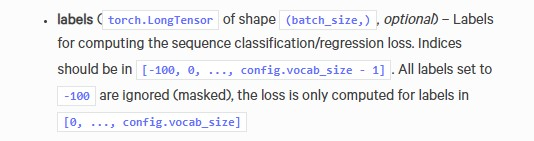

In [39]:
labels = question_encoding["input_ids"]
labels
# We therefore need to convert input_ids of 0 to -100.


tensor([[  493,    63, 14549,    47,     3, 30940,    21,   160,  5093,  3605,
            57,    84,   797,    58,     1,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]])

In [40]:
labels[labels == 0] = -100
labels

tensor([[  493,    63, 14549,    47,     3, 30940,    21,   160,  5093,  3605,
            57,    84,   797,    58,     1,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100]])

# Understanding the T5 Transformer

The T5 is a unified framework that converts every language problem into a text-to-text format. Due to the scale of the pretrained dataset C4, the T5 is able to achieve state-of-the-art results on many benchmarks covering summarization, question answering, text classficiation, and more. 

T5 works well on a variety of tasks out-of-the-box by prepending a different prefix to the input corresponding to each task, e.g. for translation: translate English to German:..., for summarization: summarize...

T5 uses [relative scalar embeddings](https://ojs.aaai.org/index.php/AAAI/article/view/17654). Encoder input padding can be done on the left and on the right. 


---
### Training

T5 is trained using [teacher forcing](https://machinelearningmastery.com/teacher-forcing-for-recurrent-neural-networks/). This means that for training, we always need an input sequence and a corresponding target sequence. The input sequence is fed to the model using input_ids. The target sequence is shifted to the right, i.e. prepended by a start-sequence token and fed to the decoder using the decoder_input_ids. In teacher-forcing style, the target sequence is then appended by the EOS token and corresponds to the labels. The PAD token is hereby used as the start-sequence token. T5 can be trained / fine-tuned both in a supervised and unsupervised fashion. 

---
### Training tips

*   T5 models need a slightly higher learning rate than the default one set in the Trainer when using the AdamW optimizer. (e.g. 1e-4, 3e-4) Note: T5 was pre-trained using the AdaFactor optimizer
*   Task prefixes should be considered if the task is similar or related to one of the supervised tasks used in T5's pre-training mixture. 

---
### Youtube-Videos
*   [The Transformer Architecture 1](https://www.youtube.com/watch?v=TQQlZhbC5ps&t=225s)
*   [The Transformer Architecture 2](https://www.youtube.com/watch?v=S27pHKBEp30&t=633s)
*   [Introduction to the T5 Transformer](https://www.youtube.com/watch?v=eKqWC577WlI&t=760s)



In [41]:
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME, return_dict = True)

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

In [42]:
# Example task 1: translate english to german
input_ids = tokenizer(
    "translate English to German: I've learned a lot about machine learning through the workshop",        # Note the prefix "translate English to German"
    return_tensors='pt'                                                                                   # Return tensors in the form of PyTorch
).input_ids

""" 
To utilize any of the pretrained capabilities of the T5, a prefix has to be 
appended to the input as an instruction to the model. 
"""

# The generate method can be considered here as a 'black box'
generated_ids = model.generate(input_ids=input_ids)
generated_ids

tensor([[    0,  1674,  2010,   732,   177,  9644,  2221,   510,     3, 11938,
           195,    15,     7, 14572,    35, 29484,     5,     1]])

In [43]:
# Decode the generated ids using the tokenizer
preds = [
         tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
         for gen_id in generated_ids         
]

In [44]:
preds

['Ich habe durch den Workshop viel über maschinelles Lernen gelernt.']

In [45]:
# To output the translation as a string and not as a list
# equivalent to preds[0]
"".join(preds)

'Ich habe durch den Workshop viel über maschinelles Lernen gelernt.'

In [46]:
# Example Task 2: Summarization Task 
text = """
summarize: Llamas are social animals and live with others as a herd. 
Their wool is soft and contains only a small amount of lanolin. 
Llamas can learn simple tasks after a few repetitions. 
When using a pack, they can carry about 25 to 30% of their body weight for 8 to 
13 km (5–8 miles). The name llama (in the past also spelled "lama" or "glama") 
was adopted by European settlers from native Peruvians.
"""

In [48]:
# Repeat the same steps as before
input_ids = tokenizer(
    text,
    return_tensors='pt'         # return tensors in the form of PyTorch
).input_ids

generated_ids = model.generate(input_ids=input_ids)
preds = [
         tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
         for gen_id in generated_ids         
        ]
"".join(preds)

# Here, the model struggles to summarize the text as the text was already
# written pretty densely

'the name llama was adopted by european settlers from native Peruvians.'

The generation method is baseed on auto-regressive language generation, which is based on the assumption that the probability distribution of a word sequence can be decomposd into the product of conditional next word distributions. Which word best to append to a word sequence based on the probability distributions depends on the search methods defineed (e.g. greedy search, beam search)

[More information on the T5 Generation Method.](huggingface.co/blog/how-to-generate)

In [49]:
# Calling the config file of the model 
model.config

T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5WithLMHeadModel"
  ],
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "prefix": "translate English to German: "
    },
    "translation_en_to_fr": {
      "early_stopping": tru

# Creating a PyTorch Dataset

We are now creating a dataset (an extension of the PyTorch dataset) which  will contain the tokenized SQuAD training dataset that is modified and labelled to be compatible with the input requiredments of the T5 Model. The following code segment illustrates the necessary modifications. 

### Why PyTorch Dataset and DataLoader?
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples. [More Info](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) 

In [50]:
class SQuADDataset(Dataset):

  # Define a constructor for the dataset
  def __init__(
      self, 
      data: pd.DataFrame,
      tokenizer: T5Tokenizer,
      source_max_token_len: int = input_max_len,
      target_max_token_len: int = ques_max_len,
  ):
    self.tokenizer = tokenizer
    self.data = data
    self.source_max_token_len = source_max_token_len
    self.target_max_token_len = target_max_token_len

  # Overwrite the length method 
  def __len__(self):
    return len(self.data)

  # Overwrite the getitem method
  def __getitem__(self, index: int):
    # 1: Read the entire row of the dataset at the given index position
    data_row = self.data.iloc[index]

    # 2: From the data row, encode the source, i.e. the pair of answer and context
    source_encoding = tokenizer(
      data_row["Answer Text"],
      data_row["Context"],
      max_length=self.source_max_token_len,
      padding="max_length",
      truncation="only_second",
      return_attention_mask=True,
      add_special_tokens=True,
      return_tensors="pt",
    )

    # 3: Repeat the encoding process for the targets, i.e. the questions
    target_encoding = tokenizer(
      data_row["Question"],
      max_length=self.target_max_token_len,
      padding="max_length",
      truncation=True,
      return_attention_mask=True,
      add_special_tokens=True,
      return_tensors="pt"
    )
    
    # 4: Return the labels from the target encoding, i.e. the input ids
    # of the target encoding tokenizer object, with the necessary modification
    labels = target_encoding['input_ids']
    labels[labels == 0] = -100

    # 5: Result of the getitem method is a dictionary
    return dict(
        question=data_row['Question'],                                            # For Visualization during Model Evaluation 
        context=data_row['Context'],                                              # For Visualization during Model Evaluation 
        answer_text=data_row['Answer Text'],                                      # For Visualization during Model Evaluation 
        # We can flatten the input ids and attention mask 
        # because the transformer will handle the batching
        input_ids=source_encoding['input_ids'].flatten(),                         # For the T5 Model during training 
        attention_mask=source_encoding['attention_mask'].flatten(),               # For the T5 Model during training 
        labels=labels.flatten()                                                   # For the T5 Model during training 
      ) 

In [51]:
# Test out the programmed dataset to assess its compatibility; Sanity Check 
sample_dataset = SQuADDataset(df_train, tokenizer)

In [52]:
for data in sample_dataset:
  print(data['question'])
  print(data['answer_text'])
  print(data['input_ids'][:10])
  print(data['labels'][:10])
  break

# Sanity Check passed

To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Saint Bernadette Soubirous
tensor([ 2788,  8942,     9,    26,  1954,   264,  8371,  8283,     1, 30797])
tensor([  304,  4068,   410,     8, 16823,  3790,     3, 18280,  2385,    16])


# Creating a PyTorch Lightning module

A datamodule is a shareable, reusable class that encapsulates all the steps needed to process data. A datamodule encapsulates the five steps involved in data processing in PyTorch:



1.   Download / tokenize / process
2.   Clean and (maybe) save to disk
3.   Load inside Dataset
4.   Apply transforms (rotate, tokenize, etc.)
5.   Wrap inside a DataLoader








In [53]:
class SQuADDataModule(pl.LightningDataModule):
  
  def __init__(
     self,
     train_df: pd.DataFrame,
     val_df: pd.DataFrame,
     test_df: pd.DataFrame,
     tokenizer: T5Tokenizer,
     batch_size: int = 8,
     source_max_token_len: int = input_max_len,
     target_max_token_len: int = ques_max_len,
  ):
    super().__init__()
    self.batch_size = batch_size
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.tokenizer = tokenizer
    self.source_max_token_len = source_max_token_len
    self.target_max_token_len = target_max_token_len
  
  # Build the training and validation datasets
  def setup(self):
    self.train_dataset = SQuADDataset(
        self.train_df,
        self.tokenizer,
        self.source_max_token_len,
        self.target_max_token_len
    )

    self.val_dataset = SQuADDataset(
        self.val_df,
        self.tokenizer,
        self.source_max_token_len,
        self.target_max_token_len

    )

    self.test_dataset = SQuADDataset(
        self.test_df,
        self.tokenizer,
        self.source_max_token_len,
        self.target_max_token_len
    )
  
  # Overload the PyTorch Lightning DataLoader method
  # A DataLoader combines a dataset and a sampler, and provides an iterable
  # over the given dataset; can be fine-tuned for better results
  def train_dataloader(self):
    return DataLoader(
        self.train_dataset,
        batch_size=self.batch_size,
        shuffle=True,
        num_workers=4
    )

  def val_dataloader(self):
    return DataLoader(
        self.val_dataset,
        # Batch size is set to 1 to emulate the real world performance
        batch_size=1,
        num_workers=4
    )

  def test_dataloader(self):
    return DataLoader(
        self.test_dataset,
        # Batch size is set to 1 to emulate the real world performance
        batch_size=1,
        num_workers=4
    )

  # Note: Different dataloaders can be created to better evaluate the performance
  # e.g. the number of workers can be tuned to optimize training speed 

In [54]:
# Here, we let df_test be a copy of df_val just to check if the methods
# in the PyTorch Lightning Modules were implemented correctly
df_test = valid_dataset
df_val = valid_dataset

data_module = SQuADDataModule(df_train, df_val, df_test, tokenizer, batch_size=6)
data_module.setup()


# Putting it all together

In the following notebooks (manual and automatic optimizations), we will define the important functions and parameters for the fine tuning of the T5 Transformer as well as prepare the dataset using the methodology outlined previously. The PyTorch Dataset and DataLoader Module will be called. 

---

We will first define the hyperparamters in a dictionary, which allows for easier access and customability. Then, we combine both the given training and validation dataset to enable freedom over the test-train-validation split of the dataset. This combined dataset is then shuffled to incorporate randomness into the split and then cleaned to prevent any duplication in entries when training the transformer, as this can skew the performance reviews. 